In [1]:
import matplotlib.pyplot as plt
import torch as nn
import numpy as np
import csv
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

C:\Users\tcx7\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
content = []
with open("CrabAgePrediction.csv") as openfile:
    for line in openfile:
        content.append(line[:-1].split(','))
        
dataset = np.array(content)
print(dataset)

[['Sex' 'Length' 'Diameter' ... 'Viscera Weight' 'Shell Weight' 'Age']
 ['F' '1.4375' '1.175' ... '5.5848515' '6.747181' '9']
 ['M' '0.8875' '0.65' ... '1.37495075' '1.5592225' '6']
 ...
 ['I' '0.625' '0.4625' ... '0.52446575' '0.63786375' '5']
 ['I' '1.0625' '0.775' ... '2.33883375' '2.9766975' '6']
 ['I' '0.7875' '0.6125' ... '1.34660125' '1.417475' '8']]


In [3]:
for i in range(1, len(dataset)):
    if dataset[i][0] == 'F':
        dataset[i][0] = 0
    if dataset[i][0] == 'M':
        dataset[i][0] = 1
    if dataset[i][0] == 'I':
        dataset[i][0] = 0.5

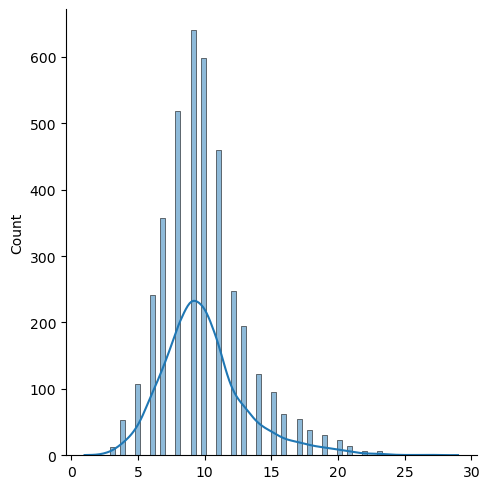

In [43]:
df_crabs = pd.DataFrame(dataset[1:][:-1], columns = dataset[0])

age_list = [int(i) for i in df_crabs[df_crabs.columns[-1]]]
age_list.sort()

sns.displot(age_list, kde = True)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df_crabs[df_crabs.columns[:-1]], df_crabs["Age"], test_size = 0.6)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
linear_model = LinearRegression(n_jobs = -1)
linear_model.fit(X_train_scaled, Y_train)

LinearRegression(n_jobs=-1)

In [8]:
linear_model.predict(X_test_scaled)

array([10.81658046,  6.17345289,  9.38634889, ...,  7.42742116,
       10.43418156,  8.69870635])

In [9]:
Y_test_converted = Y_test.astype(float)

In [10]:
def print_statistics(y_true, y_pred):
    rss = np.sum((y_true - y_pred) ** 2)
    ss = np.sum((y_true - y_true.mean()) ** 2)
    print(f"R^2: {1 - rss/ss}")
    print(f"RSS: {rss}")
    print(f"RMSE: {np.sqrt(np.mean((y_true - y_pred) ** 2))}")
    print(f"MAE: {np.mean(abs(y_true - y_pred))}")
    
y_pred = linear_model.predict(X_test_scaled)
print_statistics(Y_test_converted, y_pred)

R^2: 0.5157909935857439
RSS: 11541.224272103904
RMSE: 2.22274438076812
MAE: 1.606988457085389
